# Classification of Urban Street Networks based on Centralities Measures

The notebook provides implementation of analysis and computation for classification of cities based on network structures. The notebook follows a linear structure. 

1. Loading of relevant libraries and dataset of 18 cities to be analysed.
2. Computing Basic Stastical properties of each city
3. Centrality Calculation and visual representation over city.
4. Comparing Centrality Distribution across various cities
5. Calculating Gini Coefficient
6. Hierarchical Clustering based on Gini Coefficient
7. Building feature vector and performing PCA Analysis
8. Cluster Identification using DBSCAN

### 1. Loading libraries and dataset

In [2]:
####Loading Relevant Libraries
import pandas as pd
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt
import prettytable
from prettytable import PrettyTable
import numpy as np


/Users/arjitkapoor/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
###Load Dataset : 18 Cities with their center latitude and longitude
Cities = pd.read_csv('Cities.csv') 
Cities = Cities.to_dict('records')

### 2. Network Structural Properties of Cities

In [4]:
### Fetching Basic Stats of Primal Networks of Cities, considering bounding box of 2500 m and driving road networks:
### https://osmnx.readthedocs.io/en/stable/osmnx.html

def get_stats(x,y):
    location_point = (x,y)
    G = ox.graph_from_point(location_point, dist=2500, dist_type="bbox", network_type="drive")
    stats = ox.basic_stats(G)
    return G, stats


Cities_stats = {}
for i in Cities:
    Cities_stats[i["Cities"]] = get_stats(i["Lat"],i["Long"])
    print(i) #counter

##basic stats
t = PrettyTable(['City', 'N',"Edges","<K>","Average Street Length"])
for i in Cities:
    t.add_row([i['Cities'],Cities_stats[i['Cities']][1]['n'],Cities_stats[i['Cities']][1]['m'],format(Cities_stats[i['Cities']][1]['k_avg'],'.2f'),format(Cities_stats[i['Cities']][1]['street_length_avg'],'.2f')])
    
print(t)    

{'Cities': 'Ahmedabad', 'Lat': 23.033863, 'Long': 72.585022}
{'Cities': 'Barcelona', 'Lat': 41.390205, 'Long': 2.154007}
{'Cities': 'Bologna', 'Lat': 44.498955, 'Long': 11.327591}
{'Cities': 'Brasilia', 'Lat': -15.793889, 'Long': -47.882778}
{'Cities': 'Cairo', 'Lat': 30.033333, 'Long': 31.233334}
{'Cities': 'Los Angeles', 'Lat': 34.052235, 'Long': -118.243683}
{'Cities': 'London', 'Lat': 51.509865, 'Long': -0.118092}
{'Cities': 'New Delhi', 'Lat': 28.6448, 'Long': 77.216721}
{'Cities': 'New York', 'Lat': 40.73061, 'Long': -73.935242}
{'Cities': 'Paris', 'Lat': 48.864716, 'Long': 2.349014}
{'Cities': 'Richmond', 'Lat': 37.54129, 'Long': -77.434769}
{'Cities': 'Savannah', 'Lat': 32.076176, 'Long': -81.088371}
{'Cities': 'Seoul', 'Lat': 37.5326, 'Long': 127.024612}
{'Cities': 'San Francisco', 'Lat': 37.773972, 'Long': -122.431297}
{'Cities': 'Venice', 'Lat': 45.438759, 'Long': 12.327145}
{'Cities': 'Vienna', 'Lat': 48.210033, 'Long': 16.363449}
{'Cities': 'Washington', 'Lat': 47.751076, 

### 3. Visual representation of Centrality distribution on Street Network.

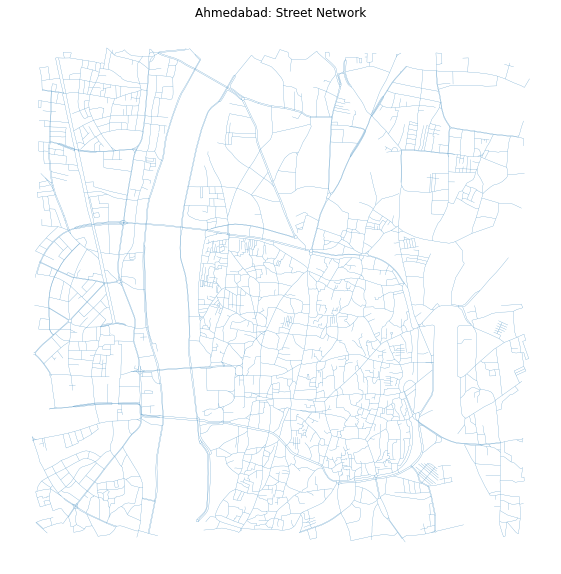

In [5]:
#### The below figures provides a visual distribution of street network for selected cities. 
#### Case City : Ahmedabad
streets_graph = Cities_stats['Ahmedabad'][0]
streets_graph = ox.projection.project_graph(streets_graph)

edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
ax.set_title("Ahmedabad: Street Network")
plt.show()


In [6]:
primal = momepy.gdf_to_nx(edges, approach='primal')

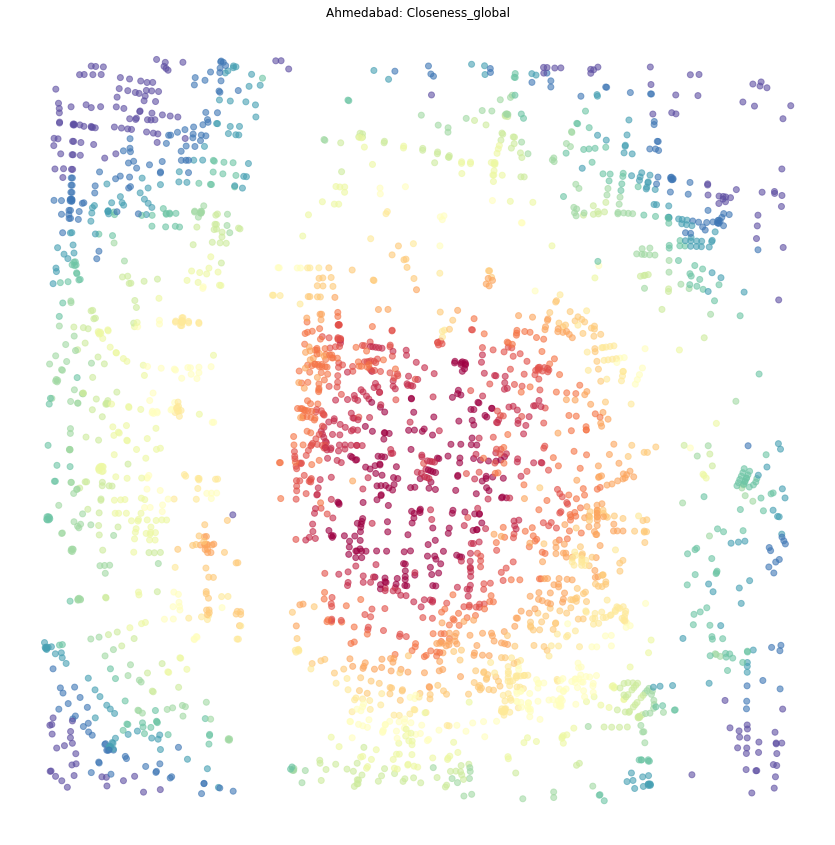

In [7]:
##### Visual Representation of Global Closeness Centrality of Ahmedabad
primal_cl = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')
nodes = momepy.nx_to_gdf(primal_cl, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('Ahmedabad: Closeness_global')
plt.show()


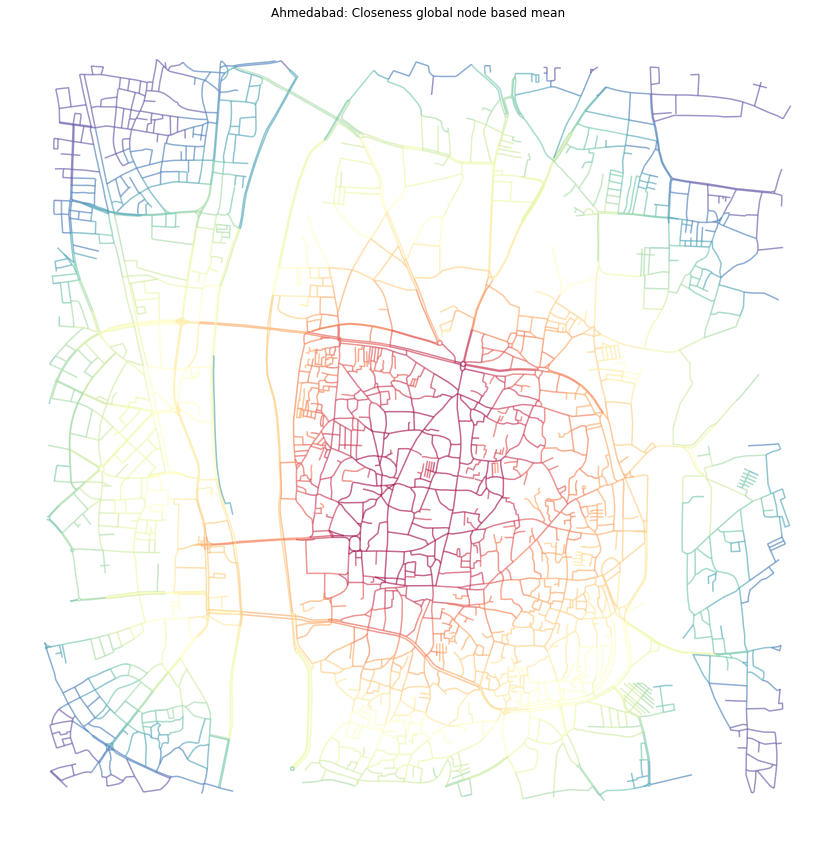

In [8]:
### Below is Closeness Centrality distributed across streets based on mean of intersections that connects the streets.

momepy.mean_nodes(primal_cl, 'closeness_global')
primal_gdf = momepy.nx_to_gdf(primal_cl, points=False)

f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='closeness_global', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('Ahmedabad: Closeness global node based mean')
plt.show()


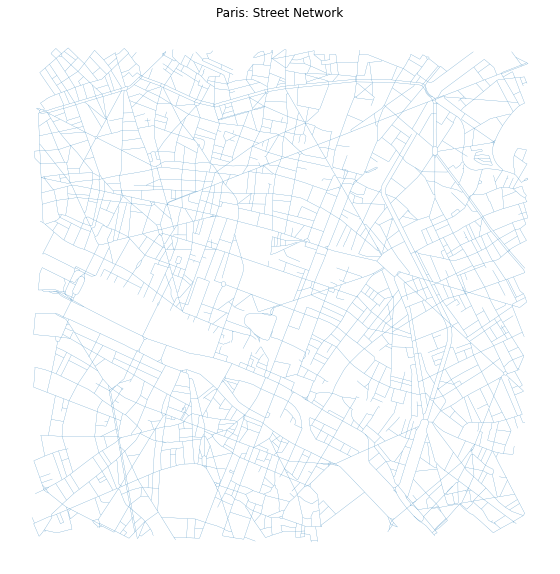

In [9]:
### Case City: Paris

streets_graph = Cities_stats['Paris'][0]
streets_graph = ox.projection.project_graph(streets_graph)

edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
ax.set_title("Paris: Street Network")
plt.show()

In [10]:
primal = momepy.gdf_to_nx(edges, approach='primal')

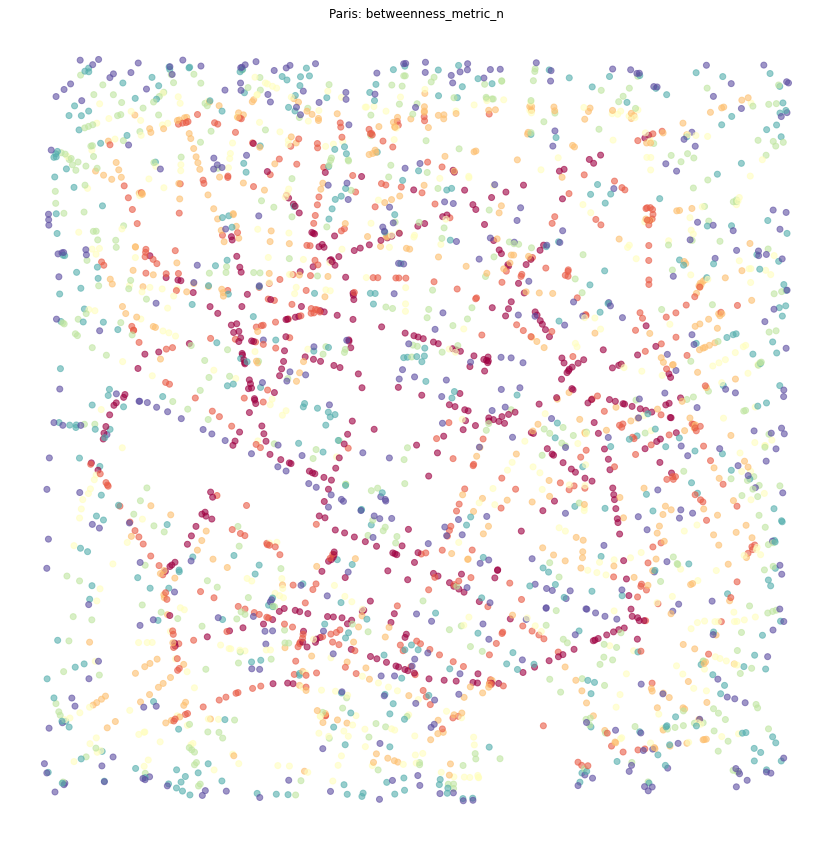

In [11]:
### Global Betweenness Centrality across Paris street network

primal_bt = momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len')
nodes = momepy.nx_to_gdf(primal_bt, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=7, alpha=0.6)
ax.set_axis_off()
ax.set_title('Paris: betweenness_metric_n')
plt.show()

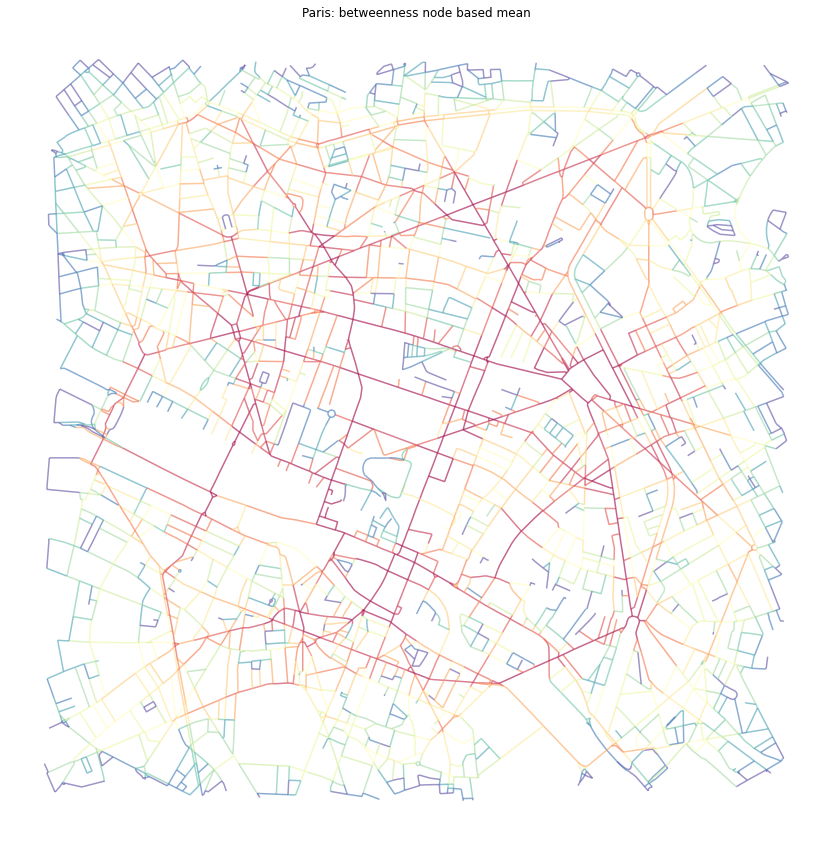

In [12]:
### Global Betweenness Centrality Distributed across street segments

momepy.mean_nodes(primal_bt, 'betweenness_metric_n')
primal_gdf = momepy.nx_to_gdf(primal_bt, points=False)

f, ax = plt.subplots(figsize=(15, 15))
primal_gdf.plot(ax=ax, column='betweenness_metric_n', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('Paris: betweenness node based mean')
plt.show()

### 4. Centrality Distribution Comparison between cities.

In [13]:
#### Centrality Distribution Calculation

def get_centralities(G):
    Cities_centralities = {}
    streets_graph = ox.projection.project_graph(G)

    edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                       node_geometry=False, fill_edge_geometry=True)
    primal = momepy.gdf_to_nx(edges, approach='primal')
    
    #Global Closeness
    primal_cl = momepy.closeness_centrality(primal, name='closeness_global', weight='mm_len')
    nodes_cl = momepy.nx_to_gdf(primal_cl, lines=False)
    
    #Node Betweeness
    primal_nb = momepy.betweenness_centrality(primal, name='betweenness_metric_n', mode='nodes', weight='mm_len')
    nodes_nb = momepy.nx_to_gdf(primal_nb, lines=False)
    
    #Straightness
    primal_st = momepy.straightness_centrality(primal)
    nodes_st = momepy.nx_to_gdf(primal_st, lines=False)
    
    Cities_centralities["Closeness"] = nodes_cl
    Cities_centralities["Betweenness"] = nodes_nb
    Cities_centralities["Straightness"] = nodes_st
    
    return Cities_centralities
    



In [14]:
Cities_Cen = {}
for i in range(len(Cities)): 
    Cities_Cen[Cities[i]["Cities"]] = get_centralities(Cities_stats[Cities[i]["Cities"]][0])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


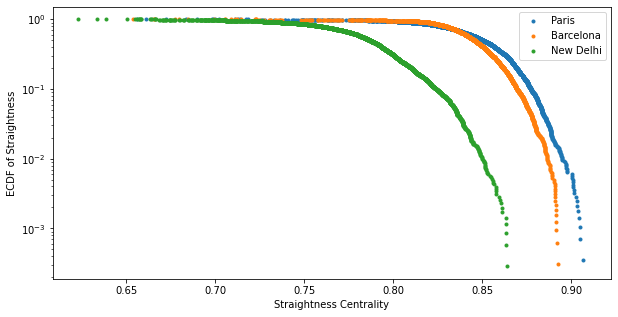

In [15]:
## Complementary Cummulative Distribution of Straightness Centrality for Paris, Barcelona and Delhi

#Paris vs Barcelona vs New Delhi
City = ["Paris","Barcelona","New Delhi"]
#Straightness

fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Straightness"]["straightness"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Straightness Centrality')
plt.ylabel('ECDF of Straightness')
plt.legend()
plt.yscale('log')
plt.show()

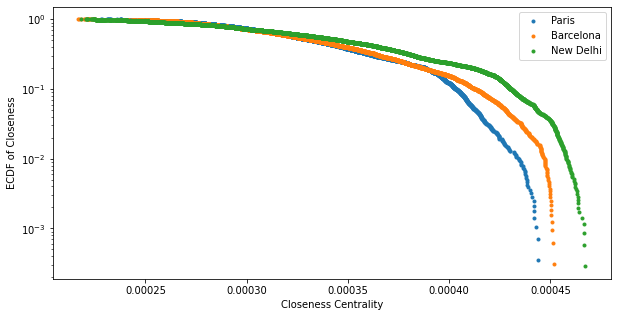

In [16]:
## Complementary Cummulative Distribution of Closeness Centrality for Paris, Barcelona and Delhi

#Closeness Global

fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Closeness"]["closeness_global"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Closeness Centrality')
plt.ylabel('ECDF of Closeness')
plt.legend()
plt.yscale('log')
plt.show()

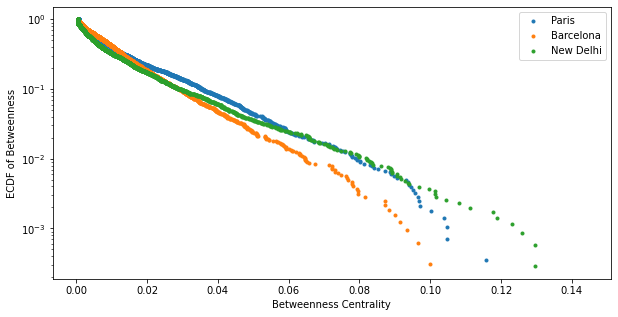

In [17]:
## Complementary Cummulative Distribution of Betweenness Centrality for Paris, Barcelona and Delhi
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Betweenness"]["betweenness_metric_n"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Betweenness Centrality')
plt.ylabel('ECDF of Betweenness')
plt.legend()
plt.yscale('log')
plt.show()

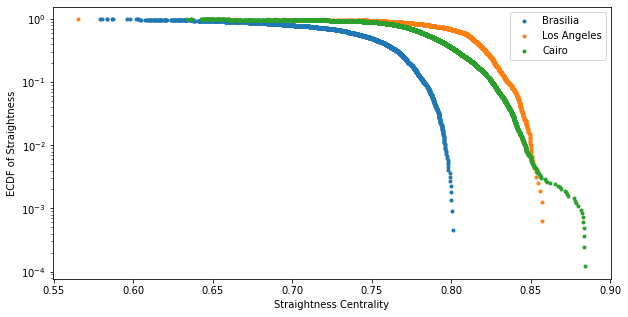

In [18]:
#############
#Brasilia vs Los Angeles vs Cairo
City = ["Brasilia","Los Angeles","Cairo"]


fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Straightness"]["straightness"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Straightness Centrality')
plt.ylabel('ECDF of Straightness')
plt.legend()
plt.yscale('log')
plt.show()


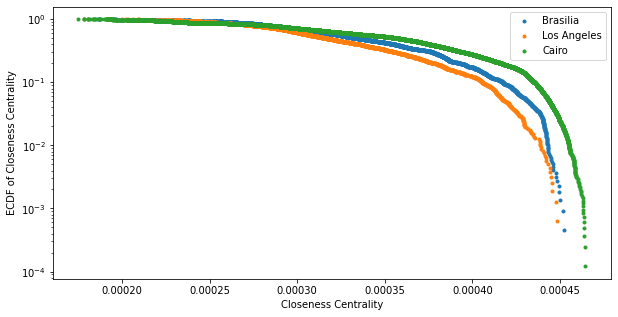

In [19]:
#Closeness Global

fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Closeness"]["closeness_global"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Closeness Centrality')
plt.ylabel('ECDF of Closeness Centrality')
plt.legend()
plt.yscale('log')
plt.show()


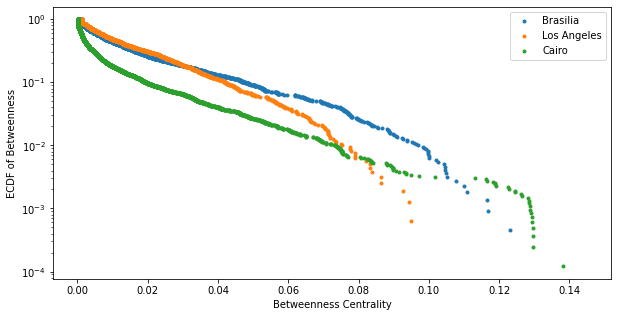

In [20]:
#Betweenness
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for C in City:
    x = np.sort(Cities_Cen[C]["Betweenness"]["betweenness_metric_n"])
    y = np.arange(1, len(x)+1) / len(x)
    y = 1-y
    ax.plot(x, y, marker='.', linestyle='none', label=C)

plt.xlabel('Betweenness Centrality')
plt.ylabel('ECDF of Betweenness')
plt.legend()
plt.yscale('log')
plt.show()


### 5. Calculating Gini Coefficient

In [21]:
### Gini Coefficient
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

##Compute Gini Coefficient for Centralities
Cities_gini = {}
for i in range(len(Cities)): 
    Cities_gini[Cities[i]["Cities"]] = [gini_coefficient(np.array(Cities_Cen[Cities[i]["Cities"]]['Closeness']['closeness_global'])),gini_coefficient(np.array(Cities_Cen[Cities[i]["Cities"]]['Betweenness']['betweenness_metric_n'])),gini_coefficient(np.array(Cities_Cen[Cities[i]["Cities"]]['Straightness']['straightness']))]
   

t = PrettyTable(['City', 'Gini Closeness',"Gini Betweenness"," Gini Straightness"])
for i in Cities:
    t.add_row([i['Cities'],format(Cities_gini[i['Cities']][0],'.2f'),format(Cities_gini[i['Cities']][1],'.2f'),format(Cities_gini[i['Cities']][2],'.2f')])
    
print(t)  

+---------------+----------------+------------------+--------------------+
|      City     | Gini Closeness | Gini Betweenness |  Gini Straightness |
+---------------+----------------+------------------+--------------------+
|   Ahmedabad   |      0.11      |       0.63       |        0.02        |
|   Barcelona   |      0.09      |       0.54       |        0.01        |
|    Bologna    |      0.11      |       0.62       |        0.02        |
|    Brasilia   |      0.10      |       0.61       |        0.03        |
|     Cairo     |      0.12      |       0.74       |        0.02        |
|  Los Angeles  |      0.10      |       0.54       |        0.02        |
|     London    |      0.09      |       0.67       |        0.02        |
|   New Delhi   |      0.10      |       0.63       |        0.02        |
|    New York   |      0.08      |       0.56       |        0.02        |
|     Paris     |      0.08      |       0.59       |        0.02        |
|    Richmond   |      0.

### 6. Hierarchical Clustering based on Gini Coefficient

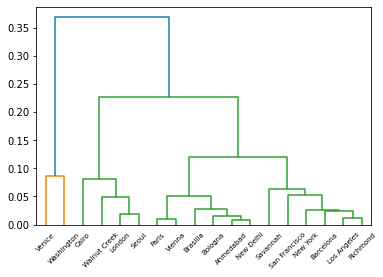

In [22]:
##Hierarchical Clustering based on Gini Coefficient
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


CG = []
BG = []
SG = [] 
labels = list(Cities_gini.keys())
for i in Cities:
    CG.append((Cities_gini[i['Cities']][0]))
    BG.append((Cities_gini[i['Cities']][1]))
    SG.append((Cities_gini[i['Cities']][2]))           
               
    
data = list(zip(CG, BG,SG))



linkage_data = linkage(data, method='complete', metric='euclidean')
dendrogram(linkage_data, labels=labels, leaf_rotation = 45, leaf_font_size = 7)


plt.show()

### 7. Feature Vector and PCA analysis

In [24]:
### Feature Vector formation based on frequency of distribution of nodes along 20 bins in Centrality Histogram

tsne_cities = {}
for k in range(len(Cities)):
    cl = Cities_Cen[Cities[k]["Cities"]]['Closeness']['closeness_global']
    bn = Cities_Cen[Cities[k]["Cities"]]['Betweenness']['betweenness_metric_n']
    st = Cities_Cen[Cities[k]["Cities"]]['Straightness']['straightness']
    bins_cl = pd.cut(cl, bins=20)
    cl_freq = bins_cl.value_counts()/sum(bins_cl.value_counts())
    bins_bn = pd.cut(bn, bins=20)
    bn_freq = bins_bn.value_counts()/sum(bins_bn.value_counts())
    bins_st = pd.cut(st, bins=20)
    st_freq = bins_st.value_counts()/sum(bins_st.value_counts())
    tsne_cities[Cities[k]["Cities"]] = list(cl_freq)+list(bn_freq)+list(st_freq)
    

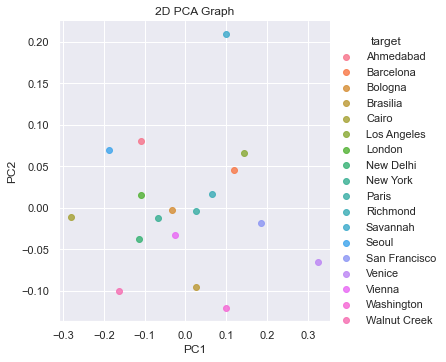

In [25]:
## Dimensionality reduction of centrality feature vector from 60 to 2




import pandas as pd
from sklearn.decomposition import PCA
X = pd.DataFrame.from_dict(tsne_cities, orient='index')
y = pd.DataFrame(tsne_cities.keys())
# Reduce from 60 to 2 features with PCA
pca = PCA(n_components=2)

# Fit and transform data
pca_features = pca.fit_transform(X)

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

# map target names to PCA features   

pca_df['target'] = y


pca_df.head()



import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )

plt.title('2D PCA Graph')
plt.show()
    

### 8. Cluster Identification using DBSCAN

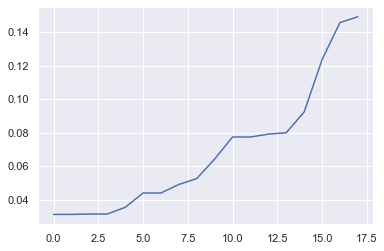

In [29]:
##Identifying Clusters using DBSCAN algorithm

#Kneeing to find appropriate eps

pca_df2 = pca_df.drop('target',axis=1)

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=2)  ##Keeping atleast 2 within cluster
neighbors_fit = neighbors.fit(pca_df2)
distances, indices = neighbors_fit.kneighbors(pca_df2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

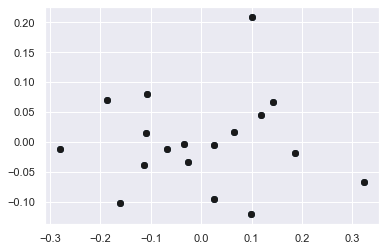

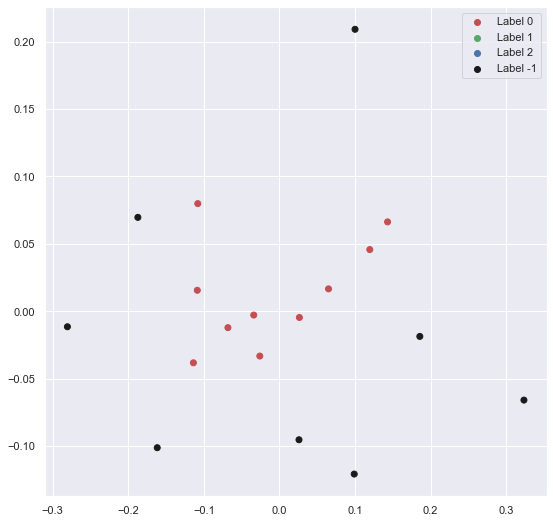

In [32]:
### DBSCAN Implementation on PCA

from sklearn.cluster import DBSCAN

pca_df2 = pca_df.drop('target',axis=1)

db_default = DBSCAN(eps = 0.075, min_samples = 3).fit(pca_df2)
labels = db_default.labels_

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(pca_df['PC1'], pca_df['PC2'], color ='r');
g = plt.scatter(pca_df['PC1'], pca_df['PC2'], color ='g');
b = plt.scatter(pca_df['PC1'], pca_df['PC2'], color ='b');
k = plt.scatter(pca_df['PC1'], pca_df['PC2'], color ='k');

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c = cvec)

# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))

plt.show()


In [34]:
## Cities which form a Cluster

l = [i for i, j in enumerate(cvec) if j == 'r']
Cluster_1 = [Cities[k]["Cities"] for k in l]

print(Cluster_1)

['Ahmedabad', 'Barcelona', 'Bologna', 'Los Angeles', 'London', 'New Delhi', 'New York', 'Paris', 'Richmond', 'Vienna']
